In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
a = 0.01; b =0.02; c = 1; mu = 2;
N = 100
M = 20
x_data = np.zeros((M*(N + 1),1))
y_data = np.zeros((M*(N + 1),1))

In [8]:
for j in range(M):
    x_data[j*(N + 1),0] = a + c*np.random.randn()
    y_data[j*(N + 1),0] = (mu - np.exp(2*x_data[j*(N + 1),0])/2.0) + np.exp(x_data[j*(N + 1),0])*np.random.randn()
    for i in range(N):
        x_data[j*(N + 1) + (i + 1),0] = (a + b*x_data[j*(N + 1) + i,0]) + c*np.random.randn()
        y_data[j*(N + 1) + (i + 1),0] = (mu - np.exp(2*x_data[j*(N + 1) + (i + 1),0])/2.0) + np.exp(x_data[j*(N + 1) + (i + 1),0])*np.random.randn()
X_data = x_data.reshape([M, N + 1, 1])
Y_data = y_data.reshape([M, N + 1, 1])

In [90]:
model = tf.keras.models.Sequential([
    layers.Dense(1000, 'tanh'),
    layers.Dense(500, 'tanh'),
    layers.Dense(200, 'tanh'),
    layers.Dense(100, 'tanh'),
    layers.Dense(50, 'tanh'),
    layers.Dense(1)
])

In [91]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
             loss=tf.keras.losses.mean_squared_error,
             )

In [96]:
model.fit(y_data, x_data, epochs=40, batch_size=101)

Train on 2020 samples
Epoch 1/40
2020/2020 [==============================] - 0s 60us/sample - loss: 0.4867
Epoch 2/40
2020/2020 [==============================] - 0s 57us/sample - loss: 0.4900
Epoch 3/40
2020/2020 [==============================] - 0s 55us/sample - loss: 0.5931
Epoch 4/40
2020/2020 [==============================] - 0s 55us/sample - loss: 0.5390
Epoch 5/40
2020/2020 [==============================] - 0s 56us/sample - loss: 0.5832
Epoch 6/40
2020/2020 [==============================] - 0s 59us/sample - loss: 0.6368
Epoch 7/40
2020/2020 [==============================] - 0s 55us/sample - loss: 0.6028
Epoch 8/40
2020/2020 [==============================] - 0s 54us/sample - loss: 0.4852
Epoch 9/40
2020/2020 [==============================] - 0s 55us/sample - loss: 0.5348
Epoch 10/40
2020/2020 [==============================] - 0s 54us/sample - loss: 0.5710
Epoch 11/40
2020/2020 [==============================] - 0s 68us/sample - loss: 0.6031
Epoch 12/40
2020/2020 [=======

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  400       
_________________________________________________________________
dense_1 (Dense)              multiple                  20100     
_________________________________________________________________
dense_2 (Dense)              multiple                  5050      
_________________________________________________________________
dense_3 (Dense)              multiple                  510       
_________________________________________________________________
dense_4 (Dense)              multiple                  11        
Total params: 26,071
Trainable params: 26,071
Non-trainable params: 0
_________________________________________________________________


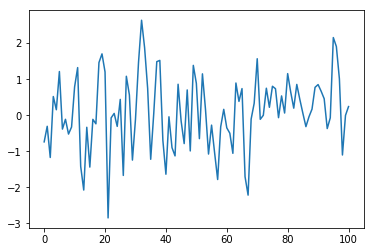

In [21]:
time = np.linspace(0, N, N + 1)
plt.plot(time, x_data)

In [44]:
x_test = np.zeros((N + 1,1))
y_test = np.zeros((N + 1,1))
x_test[0,0] = a + c*np.random.randn()
y_test[0,0] = (mu - np.exp(2*x_test[0,0])/2.0) + np.exp(x_test[0,0])*np.random.randn()
for i in range(N):
    x_test[i + 1,0] = (a + b*x_test[i,0]) + c*np.random.randn()
    y_test[i + 1,0] = (mu - np.exp(2*x_test[i + 1,0])/2.0) + np.exp(x_test[i + 1,0])*np.random.randn()

In [101]:
y_predict = model.predict(y_test)

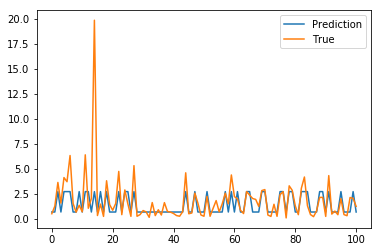

In [102]:
time = np.linspace(0, N, N + 1)
plt.plot(time, np.exp(y_predict), label = "Prediction")
plt.plot(time, np.exp(x_test), label = "True")
plt.legend()
plt.show()

In [34]:
model_2 = tf.keras.models.Sequential([
    layers.SimpleRNN(101, return_sequences=True),
    layers.SimpleRNN(101, return_sequences=True),
    layers.SimpleRNN(101, return_sequences=True),
    layers.SimpleRNN(101, return_sequences=True),
    layers.Dense(1)
])

In [35]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.mean_squared_error,
             )

In [36]:
model_2.fit(Y_data, X_data, epochs=100, batch_size=101)

Train on 20 samples
Epoch 1/100
20/20 [==============================] - 2s 105ms/sample - loss: 1.8607
Epoch 2/100
20/20 [==============================] - 0s 5ms/sample - loss: 1.0596
Epoch 3/100
20/20 [==============================] - 0s 5ms/sample - loss: 0.9960
Epoch 4/100
20/20 [==============================] - 0s 5ms/sample - loss: 0.8839
Epoch 5/100
20/20 [==============================] - 0s 5ms/sample - loss: 0.7052
Epoch 6/100
20/20 [==============================] - 0s 5ms/sample - loss: 0.6018
Epoch 7/100
20/20 [==============================] - 0s 5ms/sample - loss: 0.5727
Epoch 8/100
20/20 [==============================] - 0s 5ms/sample - loss: 0.5915
Epoch 9/100
20/20 [==============================] - 0s 5ms/sample - loss: 0.6137
Epoch 10/100
20/20 [==============================] - 0s 6ms/sample - loss: 0.5904
Epoch 11/100
20/20 [==============================] - 0s 6ms/sample - loss: 0.5519
Epoch 12/100
20/20 [==============================] - 0s 6ms/sample - loss

Epoch 100/100
20/20 [==============================] - 0s 5ms/sample - loss: 0.1353


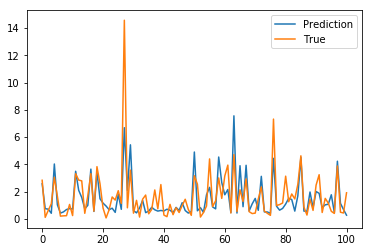

In [45]:
y_predict = model_2.predict(y_test.reshape([1, N + 1, 1]))
y_predict = y_predict.reshape([N + 1, 1])
time = np.linspace(0, N, N + 1)
plt.plot(time, np.exp(y_predict), label = "Prediction")
plt.plot(time, np.exp(x_test), label = "True")
plt.legend()
plt.show()

In [1]:
import pandas as pd

In [ ]:
out = pd.DataFrame({'S': y_predict})